## Linear Regression

### Part 1 - Data Preprocessing

### Importing the dataset

In [47]:
# using ISO-8859-1 for specific file importing
import pandas as pd
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
data_head = data.head()

### HANDLE MISSING VALUES

In [48]:
data.isnull().sum()
# identifying missing values in the dataset

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [49]:
data.dropna(axis = 1, inplace= True)
data.isnull().sum()
# dropping missing category values

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

### Handling Outliers

In [50]:
import numpy as np
numeric_columns = data.select_dtypes(include= [np.number]).columns
z_scores= np.abs((data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std())
z_scores

data = data[(z_scores < 3).all(axis = 1)]


### Getting the inputs and output

In [51]:
# Selecting specific 'STATUS' ('RESOLVED', 'SHIPPED')
filtered_data = data[~data['STATUS'].isin(['On Hold', 'Disputed', 'Cancelled'])]


In [52]:
# Encode categorical variables: DEALSIZE, PRODUCTLINE
filtered_data = pd.get_dummies(filtered_data, columns=['DEALSIZE', 'PRODUCTLINE'], drop_first=True)

### Selecting relevant features and the target variable

In [53]:
# Select features and target variable
X = filtered_data[['MSRP', 'QUANTITYORDERED', 'PRICEEACH',] + 
                  [col for col in filtered_data.columns if 'DEALSIZE_' in col or 'PRODUCTLINE_' in col]]
y = filtered_data['SALES']

In [54]:
X

,MSRP,QUANTITYORDERED,PRICEEACH,DEALSIZE_Medium,DEALSIZE_Small,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,95,30,95.70,False,True,True,False,False,False,False,False
1,95,34,81.35,False,True,True,False,False,False,False,False
2,95,41,94.74,True,False,True,False,False,False,False,False
3,95,45,83.26,True,False,True,False,False,False,False,False
4,95,49,100.00,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2817,54,42,97.16,True,False,False,False,True,False,False,False
2818,54,20,100.00,False,True,False,False,True,False,False,False
2819,54,29,100.00,True,False,False,False,True,False,False,False
2820,54,43,100.00,True,False,False,False,True,False,False,False


In [55]:
y

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2817    4080.72
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
Name: SALES, Length: 2674, dtype: float64

### Creating the Training Set and the Test Set

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
X_train

,MSRP,QUANTITYORDERED,PRICEEACH,DEALSIZE_Medium,DEALSIZE_Small,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
1139,99,21,89.29,False,True,False,False,False,False,False,True
713,122,22,98.18,False,True,False,False,False,False,True,False
1358,50,29,51.82,False,True,False,False,False,False,False,True
2275,62,24,49.71,False,True,False,False,False,True,False,False
2411,58,38,66.78,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1820,88,35,87.62,True,False,False,False,False,False,False,True
808,60,42,51.48,False,True,True,False,False,False,False,False
884,101,46,100.00,True,False,False,False,False,False,False,True
1737,35,36,37.13,False,True,False,False,False,False,False,False


In [59]:
X_test

,MSRP,QUANTITYORDERED,PRICEEACH,DEALSIZE_Medium,DEALSIZE_Small,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
2235,54,40,43.83,False,True,False,False,False,False,True,False
2092,97,39,100.00,True,False,False,False,False,False,False,True
859,132,27,100.00,True,False,False,False,False,False,False,False
2788,49,44,86.13,True,False,False,True,False,False,False,False
1201,62,31,52.84,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2589,72,38,65.77,False,True,False,False,True,False,False,False
2537,90,26,100.00,False,True,False,False,True,False,False,False
2388,115,37,100.00,True,False,False,False,False,False,True,False
605,77,20,63.14,False,True,False,False,False,False,False,False


In [60]:
y_train

1139    1875.09
713     2159.96
1358    1502.78
2275    1193.04
2411    2537.64
         ...   
1820    3066.70
808     2162.16
884     5545.76
1737    1336.68
2748    3233.49
Name: SALES, Length: 2139, dtype: float64

In [61]:
y_test

2235    1753.20
2092    4424.16
859     3528.36
2788    3789.72
1201    1638.04
         ...   
2589    2499.26
2537    2612.48
2388    3983.05
605     1262.80
593     8078.40
Name: SALES, Length: 535, dtype: float64

## Part 2 - Building and training the model

In [62]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Interference

In [63]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [64]:
y_pred

array([1758.35389037, 4457.86303769, 3966.47867243, 3955.08523175,
       1478.0282623 , 4769.7740922 , 2229.1521906 , 4220.11118168,
       4876.68729112, 1299.81393332, 2102.65385517, 4579.69854872,
       4056.41679444, 4475.48610929, 4809.84125837, 2622.33946877,
       2695.07919155, 1356.7053261 , 2181.07339939, 4927.73359517,
       2460.60152867, 5113.6838931 , 3966.47867243, 1337.44859885,
       3916.53693969, 4214.97507078, 2483.07433021, 1979.12031841,
       3586.64570656,  789.84979559, 8370.51422027, 3811.25820873,
       4927.73359517,  524.45424033,  387.94225203, 2413.8892688 ,
       1789.33247773, 4801.58681709, 1749.07710071, 2258.52092448,
       2187.05193622, 5156.42207732, 2638.0824184 , 1361.62590163,
       3109.18681251, 1810.1330037 , 2688.90075424, 4125.36406331,
       4577.60468051, 3675.31717991, 2905.58271906, 2607.50153559,
       5020.62822631, 2519.56203267, 4706.30234008, 2122.00173568,
       1980.41488745, 2469.89681709, 1642.99261275, 1498.54667

In [65]:
y_test

2235    1753.20
2092    4424.16
859     3528.36
2788    3789.72
1201    1638.04
         ...   
2589    2499.26
2537    2612.48
2388    3983.05
605     1262.80
593     8078.40
Name: SALES, Length: 535, dtype: float64

## Part 3: Evaluating the Model

### R-squared

In [66]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9106864722954608


### Adjusted R-Squared

In [67]:
k = X_test.shape[1]
k

11

In [68]:
n = X_test.shape[0]
n

535

In [69]:
adj_r2 = 1-(1-r_squared)*(n-1)/(n-k-1)
adj_r2

0.9088079850970863

###  MEANS SQUARED ERROR

In [70]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 263551.4350617277


### Getting the coefficients of the model

In [71]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

# Interpretation:
# Higher coefficients indicate stronger relationships with the target variable (Sales).


,Coefficient
MSRP,7.149870
QUANTITYORDERED,67.896926
PRICEEACH,32.568915
DEALSIZE_Medium,-2502.921634
DEALSIZE_Small,-3205.569752
PRODUCTLINE_Motorcycles,-20.949074
PRODUCTLINE_Planes,-120.471118
PRODUCTLINE_Ships,-181.523639
PRODUCTLINE_Trains,66.601995
PRODUCTLINE_Trucks and Buses,-1.050893


### VISUALIZATION

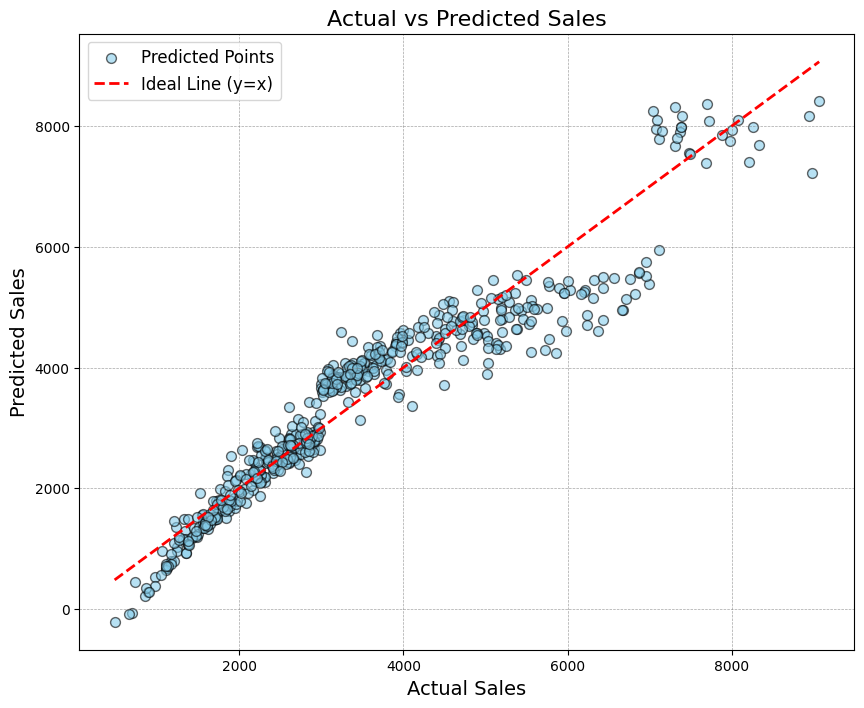

In [72]:
import matplotlib.pyplot as plt

# Assuming `y_actual` is the actual sales values and `y_predicted` is the predicted sales values
plt.figure(figsize=(10, 8))  # Increase figure size for better readability

# Plot the actual vs predicted sales as a scatter plot
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6, edgecolor='k', s=50, label='Predicted Points')

# Plot the ideal prediction line (y=x) for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line (y=x)')

# Adding a title and labels with larger font sizes for readability
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)

# Adding a legend
plt.legend(loc='upper left', fontsize=12)

# Adding a grid for better visual alignment
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()